# Business Hypothesis Testing to Find Employment Status versus Propensity for Term Deposits

<b> Formulate the hypothesis between employment status and the propensity for term deposits. Let the hypothesis be as follows: High paying employees prefer term deposits than other categories of employees. </b>

<b> Install and import the necessary libraries </b>

In [1]:
import pandas as pd
import altair as alt
import warnings
warnings.filterwarnings('ignore')

<b> From the banking DataFrame, bankData, find the distribution of employment status using the .groupby(), .agg() and .reset_index() methods.

Group the data with respect to employment status using the .groupby() method and find the total count of propensities for each employment status using the .agg() method. </b>

In [2]:
# data url path
file_url = 'https://raw.githubusercontent.com/PacktWorkshops/The-Data-Science-Workshop/master/Chapter03/bank-full.csv'

In [3]:
# load data
bankData = pd.read_csv(file_url, sep=';')
bankData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
# Group the data per age 
jobTot = bankData.groupby('job')['y'].agg(jobTot='count').reset_index()
jobTot.head()

,job,jobTot
0,admin.,5171
1,blue-collar,9732
2,entrepreneur,1487
3,housemaid,1240
4,management,9458


In [5]:
jobProp = bankData.groupby(['job', 'y'])['y'].agg(jobCat='count').reset_index()

<b> Merge both DataFrames and then find the propensity count by calculating the proportion of propensity for each type of employment status. When creating the new variable for finding the propensity proportion. </b>

In [6]:
jobComb = pd.merge(jobProp, jobTot, on=['job'])
jobComb['catProp'] = (jobComb.jobCat/jobComb.jobTot)*100

jobComb.head()

,job,y,jobCat,jobTot,catProp
0,admin.,no,4540,5171,87.797331
1,admin.,yes,631,5171,12.202669
2,blue-collar,no,9024,9732,92.725031
3,blue-collar,yes,708,9732,7.274969
4,entrepreneur,no,1364,1487,91.728312


<b> Plot the data and summarize intuitions from the plot using matplotlib. Use the stacked bar chart for this activity. </b>

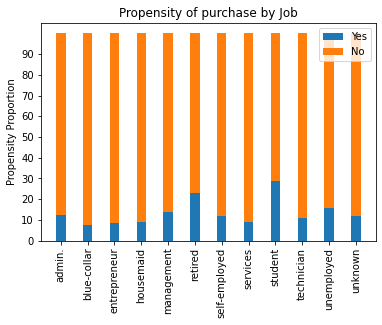

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Create seperate data frames for Yes and No
jobcombYes = jobComb[jobComb['y'] == 'yes']
jobcombNo = jobComb[jobComb['y'] == 'no']

# Get the length of the xaxis labels 
xlabels = jobTot['job'].nunique()

# Get the proportion values 
jobYes = jobcombYes['catProp'].unique()
jobNo = jobcombNo['catProp'].unique()

# Arrange the indexes of x asix
ind = np.arange(xlabels)

# Get the width of each bar
width = 0.35  

# Getting the plots
p1 = plt.bar(ind, jobYes, width)
p2 = plt.bar(ind, jobNo, width,bottom=jobYes)

plt.ylabel('Propensity Proportion')
plt.title('Propensity of purchase by Job')

# Defining the x label indexes and y label indexes
plt.xticks(ind, jobTot['job'].unique())
plt.yticks(np.arange(0, 100, 10))

# Defining the legends
plt.legend((p1[0], p2[0]), ('Yes', 'No'))

# To rotate the axis labels 
plt.xticks(rotation=90)
plt.show()

# Logistic Regression Model with Feature Engineered Variables

<b> Create dummy variables for the categorical variables and exclude original raw variables such as loan and housing, which were used to create the new variable, assetIndex </b>

In [8]:
bankCat = pd.get_dummies(bankData[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']])
bankCat.shape

(45211, 44)

In [9]:
#  normalize the numerical variables
from sklearn import preprocessing
x = bankData[['balance']].values.astype(float)

minmaxScaler = preprocessing.MinMaxScaler()
bankData['balanceTran'] = minmaxScaler.fit_transform(x)

In [10]:
# add a small value of 0.001 so as to eliminate the 0 values in the variable
bankData['balanceTran'] = bankData['balanceTran'] + 0.00001

In [11]:
# add two additional columns for introducing the transformed variables for loans and housing
bankData['loanTran'] = 1
# Giving a weight of 5 if there is no loan
bankData.loc[bankData['loan'] == 'no', 'loanTran'] = 5

In [12]:
# transform values for the Housing data
bankData['houseTran'] = 5
bankData.loc[bankData['housing'] == 'no', 'houseTran'] = 1

In [13]:
bankData['assetIndex'] = bankData['balanceTran'] * bankData['loanTran'] * bankData['houseTran']

<b> Select the numerical variables including the new feature engineered variable, assetIndex </b>

In [14]:
bankNum = bankData[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'assetIndex']]
bankNum.head()

,age,balance,day,duration,campaign,pdays,previous,assetIndex
0,58,2143,5,261,1,-1,0,2.306734
1,44,29,5,151,1,-1,0,1.826916
2,33,2,5,76,1,-1,0,0.364158
3,47,1506,5,92,1,-1,0,2.162153
4,33,1,5,198,1,-1,0,0.364112


<b> Transform some of the numerical variables by normalizing them using the MinMaxScaler() function </b>

In [15]:
minmaxScaler = preprocessing.MinMaxScaler()

ageT1 = bankNum[['age']].values.astype(float)
dayT1 = bankNum[['day']].values.astype(float)
durT1 = bankNum[['duration']].values.astype(float)

bankNum['ageTran'] = minmaxScaler.fit_transform(ageT1)
bankNum['dayTran'] = minmaxScaler.fit_transform(dayT1)
bankNum['durTran'] = minmaxScaler.fit_transform(durT1)

In [16]:
bankNum2 = bankNum[['ageTran','dayTran','durTran','campaign','pdays','previous','assetIndex']]
bankNum2.head()

,ageTran,dayTran,durTran,campaign,pdays,previous,assetIndex
0,0.519481,0.133333,0.053070,1,-1,0,2.306734
1,0.337662,0.133333,0.030704,1,-1,0,1.826916
2,0.194805,0.133333,0.015453,1,-1,0,0.364158
3,0.376623,0.133333,0.018707,1,-1,0,2.162153
4,0.194805,0.133333,0.040260,1,-1,0,0.364112


<b> Concatenate the numerical variables and categorical variables and then create X and Y variables </b>

In [17]:
X = pd.concat([bankCat, bankNum2], axis=1)
print(X.shape)
# Preparing the Y variable
Y = bankData['y']
print(Y.shape)

(45211, 51)
(45211,)


<b> Split the dataset in train and test and then fit a new model using the LogisticRegression() model on the new features </b>

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=123)

In [19]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [20]:
pred = model.predict(X_test)

<b> Analyze the results after generating the confusion matrix and classification report</b>

In [21]:
from sklearn.metrics import confusion_matrix, classification_report

In [22]:
confusionMatrix = confusion_matrix(y_test ,pred)
print(confusionMatrix)

[[11842   156]
 [ 1279   287]]


In [23]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

          no       0.90      0.99      0.94     11998
         yes       0.65      0.18      0.29      1566

    accuracy                           0.89     13564
   macro avg       0.78      0.59      0.61     13564
weighted avg       0.87      0.89      0.87     13564

